In [447]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, svm, datasets, model_selection
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import xgboost as xgb
from xgboost import XGBClassifier, plot_tree, XGBRegressor
from sklearn.model_selection import learning_curve, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold, RepeatedKFold
import math

In [335]:
%matplotlib inline
plt.style.use('bmh')


Import dataset without outliers

In [336]:
carsWithoutOutliers = pd.read_csv('carsoutlier.csv')


Import dataset with outliers

In [337]:
carsWithOutliers = pd.read_csv('carsoutlier.csv')

In [338]:
carsWithOutliers.size

51384

In [339]:
carsWithOutliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6423 entries, 0 to 6422
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   make          6423 non-null   object
 1   model         6423 non-null   object
 2   year          6423 non-null   int64 
 3   milage        6423 non-null   int64 
 4   fuel          6423 non-null   object
 5   horsepower    6423 non-null   int64 
 6   transmission  6423 non-null   object
 7   price         6423 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 401.6+ KB


In [340]:
carsWithoutOutliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6423 entries, 0 to 6422
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   make          6423 non-null   object
 1   model         6423 non-null   object
 2   year          6423 non-null   int64 
 3   milage        6423 non-null   int64 
 4   fuel          6423 non-null   object
 5   horsepower    6423 non-null   int64 
 6   transmission  6423 non-null   object
 7   price         6423 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 401.6+ KB


Here we can see that our features all have equal values. Our data is clean and uniform, ready to train

In [341]:
carsWithOutliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6423 entries, 0 to 6422
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   make          6423 non-null   object
 1   model         6423 non-null   object
 2   year          6423 non-null   int64 
 3   milage        6423 non-null   int64 
 4   fuel          6423 non-null   object
 5   horsepower    6423 non-null   int64 
 6   transmission  6423 non-null   object
 7   price         6423 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 401.6+ KB


As shown below, we can see that the prices of the cars in our dataset are skewed to the left. We have some outliers the lie above the price of around 120,000. We will get rid of these to get a normal distribution of the independant variable

# HP Distribution 

count    6423.000000
mean      165.709482
std        96.829112
min        10.000000
25%       103.000000
50%       134.000000
75%       189.000000
max       762.000000
Name: horsepower, dtype: float64


/Users/amekid/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


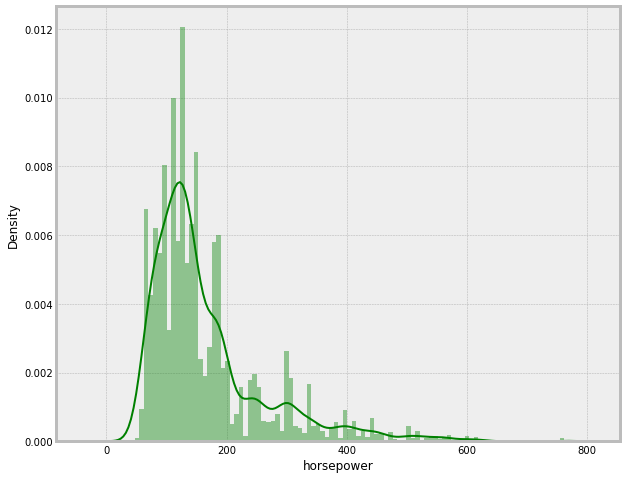

In [342]:
print(carsWithOutliers['horsepower'].describe())
plt.figure(figsize=(9,8))
sns.distplot(carsWithOutliers['horsepower'], color='g', bins=100, hist_kws={'alpha':0.4});

# Price and mileage distribution after removing outliers

/Users/amekid/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/amekid/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


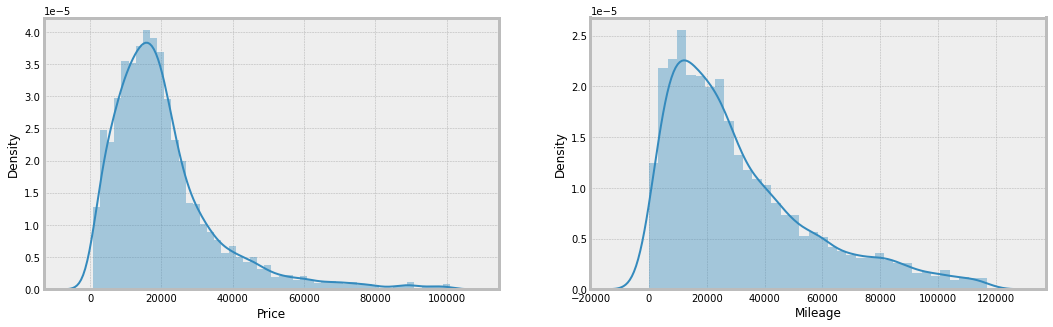

In [343]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.xlabel('Price')
sns.distplot(carsWithoutOutliers[['price']])
plt.subplot(1,2,2)
plt.xlabel('Mileage')
sns.distplot(carsWithoutOutliers[['milage']])
plt.show()

In [344]:
outliers = pd.read_csv('cars11.csv')

In [345]:
outliers.head()

,Unnamed: 0,make,model,year,mileage,fuel,power,transmission,price
0,0,MINI,Mini,2018,34503,Petrol,189,Manual,17799
1,1,Mercedes-Benz,GLC-Class,2018,11294,Petrol,362,Automatic,40500
2,2,PORSCHE,911,1997,26900,Petrol,282,Manual,129995
3,3,LAND,ROVER,2020,17800,Diesel,178,Automatic,51495
4,4,AUDI,RS3,2016,32400,Petrol,362,Semi Automatic,35990


In [346]:
outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6632 entries, 0 to 6631
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    6632 non-null   int64 
 1   make          6632 non-null   object
 2   model         6632 non-null   object
 3   year          6632 non-null   int64 
 4   mileage       6632 non-null   int64 
 5   fuel          6632 non-null   object
 6   power         6632 non-null   int64 
 7   transmission  6632 non-null   object
 8   price         6632 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 466.4+ KB


# Price and mileage distribution before removing outliers

/Users/amekid/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/amekid/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


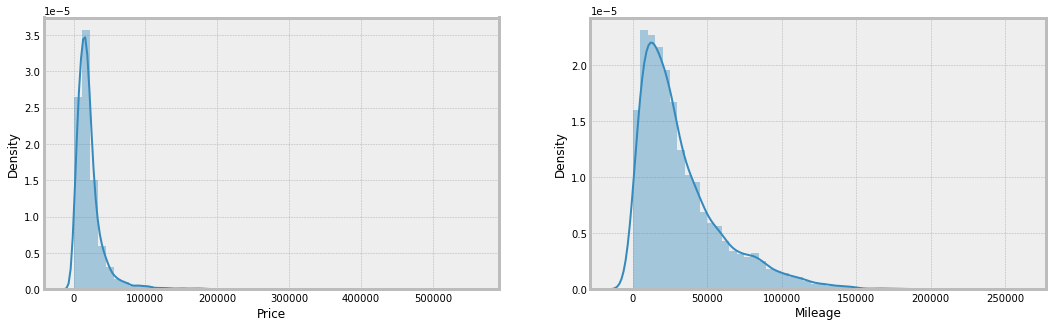

In [347]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.xlabel('Price')
sns.distplot(outliers[['price']])
plt.subplot(1,2,2)
plt.xlabel('Mileage')
sns.distplot(outliers[['mileage']])
plt.show()

In [348]:
print("Highest allowed",outliers[['price']].mean() + 3*carsWithOutliers[['price']].std())
print("Highest allowed",outliers[['mileage']].mean() + 3*carsWithOutliers[['milage']].std())

Highest allowed price    68950.042215
dtype: float64
Highest allowed milage    NaN
mileage   NaN
dtype: float64


Encode labels. Non-numeric to numeric

In [349]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

carsWithoutOutliers[['make', 'model', 'transmission', 'fuel']] = carsWithoutOutliers[['make', 'model', 'transmission', 'fuel']].apply(le.fit_transform)

In [350]:
list(set(carsWithoutOutliers.dtypes.tolist()))



[dtype('int64')]

Taking a look at the dataset now, we can see that the non numerical features are now represented numerically 

In [351]:
carsWithoutOutliers_num = carsWithoutOutliers[['make', 'model', 'transmission', 'fuel']].select_dtypes(include=['int64'])
carsWithoutOutliers_num.head()

,make,model,transmission,fuel
0,92,347,2,3
1,98,241,0,3
2,82,403,0,0
3,42,405,3,3
4,49,30,3,3


We can now see the disribution of the formally non numerical features 

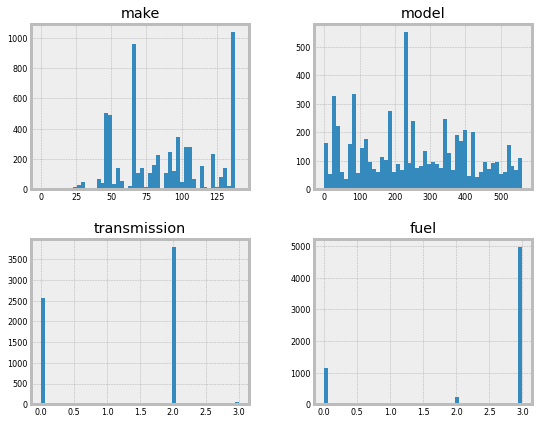

In [352]:
carsWithoutOutliers_num.hist(figsize=(8, 7), bins=50, xlabelsize=8, ylabelsize=8);

Here we find the feature with the stronges correlation with the price of a car

In [353]:
carsWithoutOutliers_num = carsWithoutOutliers
carsWithoutOutliers_num_corr = carsWithoutOutliers_num.corr()['price'][:-1] # -1 because the latest row is SalePrice
golden_features_list = carsWithoutOutliers_num_corr[abs(carsWithoutOutliers_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Price:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with Price:
horsepower    0.766223
Name: price, dtype: float64


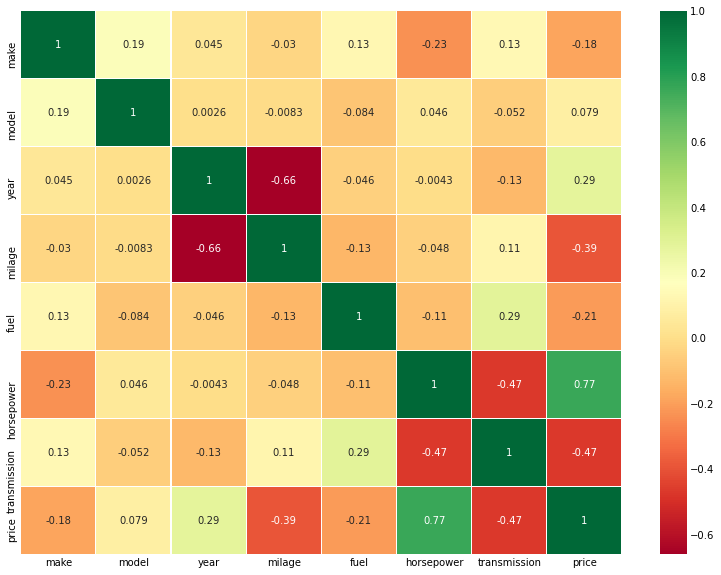

In [354]:
# correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(carsWithoutOutliers_num.corr(), annot=True, cmap='RdYlGn', linewidths=0.2);


Distribution of car features with the price of a car

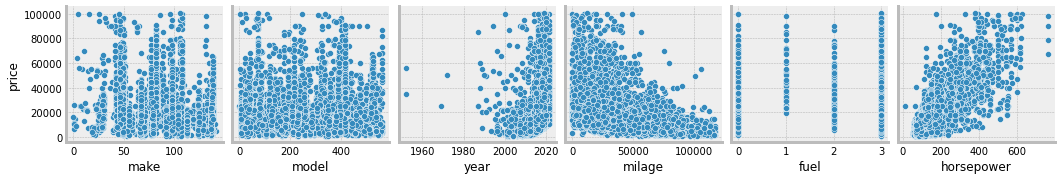

In [355]:
for i in range(0, len(carsWithoutOutliers_num.columns), 10):
    sns.pairplot(data=carsWithoutOutliers_num,
                x_vars=carsWithoutOutliers_num.columns[i:i+6],
                y_vars=['price'])

In [356]:
carsWithoutOutliers_num.head()

,make,model,year,milage,fuel,horsepower,transmission,price
0,92,347,2018,34503,3,189,2,17799
1,98,241,2018,11294,3,362,0,40500
2,82,403,2020,17800,0,178,0,51495
3,42,405,2016,32400,3,362,3,35990
4,49,30,2013,52894,3,414,3,29990


In [357]:
carsWithoutOutliers_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6423 entries, 0 to 6422
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   make          6423 non-null   int64
 1   model         6423 non-null   int64
 2   year          6423 non-null   int64
 3   milage        6423 non-null   int64
 4   fuel          6423 non-null   int64
 5   horsepower    6423 non-null   int64
 6   transmission  6423 non-null   int64
 7   price         6423 non-null   int64
dtypes: int64(8)
memory usage: 401.6 KB


In [358]:
#x = carsWithoutOutliers[['year','milage','horsepower']]
x = carsWithoutOutliers[['make','model','year','milage','fuel','horsepower', 'transmission']]
y = carsWithoutOutliers['price']
xNew = carsWithoutOutliers[['make','model','year','milage','horsepower']]

In [359]:
x.shape


(6423, 7)

In [360]:
xNew.shape

(6423, 5)

A representation of the correlation betweeen the horsepower and price of a car. There is clearly a y=x like relation, indicating a strong correlation

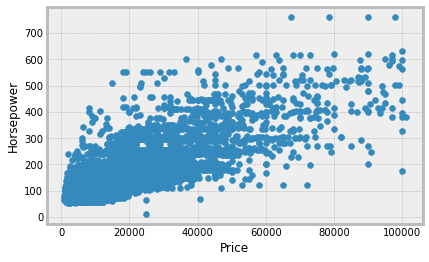

In [361]:

plt.scatter(carsWithoutOutliers['price'], carsWithoutOutliers['horsepower'])
#plt.ylim([100, 10000])
#plt.xlim([0,20000])
plt.xlabel("Price")
plt.ylabel("Horsepower")
plt.show()


Splitting the dataset into testing a training 

In [362]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle=False)


A funtion to plot learning curves for a machine learning model 

In [363]:
def learning_curves(estimator, features, target, train_sizes, cv):
        train_sizes, train_scores, validation_scores = learning_curve(estimator, features, target, train_sizes =train_sizes, cv = cv, scoring = 'neg_mean_squared_error')
        train_scores_mean = -train_scores.mean(axis = 1)
        validation_scores_mean = -validation_scores.mean(axis = 1)

        plt.figure(figsize=(10,6))
        plt.plot(train_sizes, train_scores_mean, label = 'Training error')
        plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

        plt.ylabel('MSE', fontsize = 14)
        plt.xlabel('Training set size', fontsize = 14)
        title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
        plt.title(title, fontsize = 18, y = 1.03)
        plt.legend()
        return train_scores_mean
        #plt.ylim(0,40)

In [364]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

xtrain = sc.fit_transform(x_train)
xtest = sc.fit_transform(x_test)

In [365]:
xtrain.shape
train_sizes = [1,50,100,250,500,1000,2000,3500,4000]

In [366]:
from sklearn.ensemble import RandomForestRegressor


## Random Forest before Feature Importance - 55.56% Accuracy

In [367]:
beforeFeatures = []
beforeFeaturesError = []

In [368]:
clf = RandomForestRegressor(n_estimators=100)

clf.fit(xtrain,y_train)

RandomForestRegressor()

In [369]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [370]:
pred = clf.predict(xtest)

In [371]:
score=r2_score(y_test,pred)
score

0.5442750491566508

In [372]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, pred)),2))

Mean Absolute Error: 8268.33
Mean Squared Error: 112496823.45
Root Mean Squared Error: 10606.45


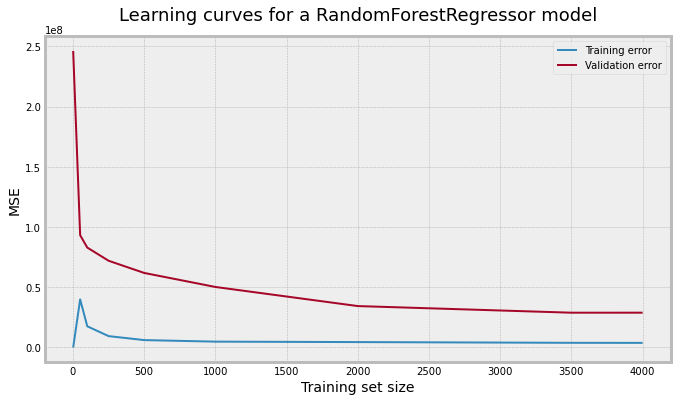

In [373]:

#estimator = RandomForestRegressor(n_estimators=100);
RFTfirst = learning_curves(clf, x, y, train_sizes, 5)
beforeFeatures.append(RFTfirst)
beforeFeaturesError.append(round(np.sqrt(metrics.mean_squared_error(y_test, pred)),2))

## Multiple Linear Regression before Feature Importance  -  63.44% Accuracy

In [374]:
regr = linear_model.LinearRegression()
regr.fit(xtrain,y_train)
predR = regr.predict(xtest)
score=r2_score(y_test,predR)

In [375]:
score

0.6344297596958977

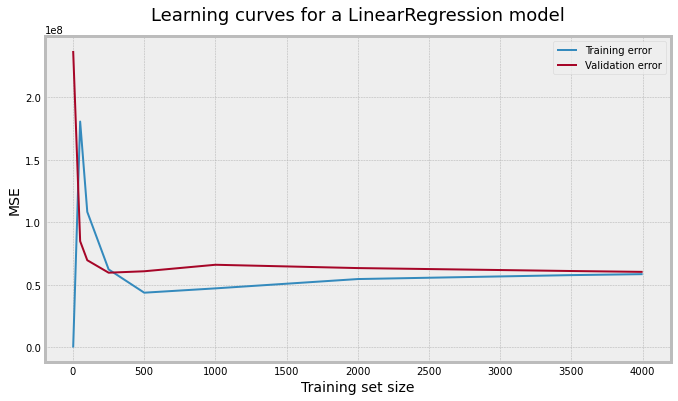

In [376]:
estimator = linear_model.LinearRegression()
LinearFirst = learning_curves(regr, xtrain ,y_train, train_sizes, 5)
beforeFeatures.append(LinearFirst)
beforeFeaturesError.append(round(np.sqrt(metrics.mean_squared_error(y_test, predR)),2))

## XGBoost before Feature Importance - 57.61% Accuracy

In [377]:
modelX = XGBRegressor(objective='reg:linear', learning_rate = 0.1, max_depth = 1, n_estimators = 100)
evalset = [(xtrain, y_train), (xtest, y_test)]
modelX.fit(xtrain, y_train, eval_metric='logloss', eval_set=evalset)
preds = modelX.predict(xtest)
print(r2_score(y_test, preds))

[23:28:28] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-logloss:-743751.87500	validation_1-logloss:-836352.50000
[1]	validation_0-logloss:-743751.87500	validation_1-logloss:-836352.50000
[2]	validation_0-logloss:-743751.87500	validation_1-logloss:-836352.50000
[3]	validation_0-logloss:-743751.87500	validation_1-logloss:-836352.50000
[4]	validation_0-logloss:-743751.87500	validation_1-logloss:-836352.50000
[5]	validation_0-logloss:-743751.87500	validation_1-logloss:-836352.50000
[6]	validation_0-logloss:-743751.87500	validation_1-logloss:-836352.50000
[7]	validation_0-logloss:-743751.87500	validation_1-logloss:-836352.50000
[8]	validation_0-logloss:-743751.87500	validation_1-logloss:-836352.50000
[9]	validation_0-logloss:-743751.87500	validation_1-logloss:-836352.50000
[10]	validation_0-logloss:-743751.87500	validation_1-logloss:-836352.50000
[11]	validation_0-logloss:-743751.87500	validation_1-logloss:-8363

[23:28:28] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[23:28:29] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[23:28:29] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[23:28:29] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[23:28:29] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[23:28:29] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[23:28:29] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[23:28:29] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[23:28:29] WARNING: ../src/objective/regression_

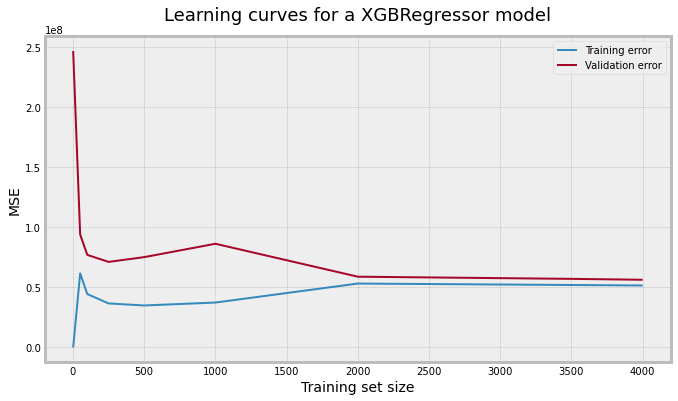

In [378]:
xgbfirst = learning_curves(modelX, x, y, train_sizes, 5)
beforeFeatures.append(xgbfirst)
beforeFeaturesError.append(round(np.sqrt(metrics.mean_squared_error(y_test, preds)),2))

In [379]:
carsWithoutOutliers.make.unique()

array([ 92,  98,  82,  42,  49,  75, 119, 108,  32, 135,  52,  39,  96,
       104,  81,  46, 106, 137, 100, 136,  66, 132,  70, 124,  67, 123,
        79, 107,  55,  71, 113,  45,  95, 128,  77,  90,  78,  58,  84,
        57,  43, 138,  27,  44, 125, 116,  50,  16, 131, 118, 127,  54,
        65, 126,  97,   2,  15,  36,  17,  38,  22,  21,  31,  25,  28,
        29,  26, 103,  30,  41,  89, 134,  64, 120,  80, 105,  68, 111,
        48,  87, 122,  69, 121, 133,  86,  94,  51,  83,  11,  99,  19,
         7,  10,  13,  14,  74,  73,  53, 129,  85,  24,   5, 117, 114,
       102,  91,  63, 110,   1, 141, 130,  23,  76,   9,   0,  47,  93,
        56, 139,  40,   4, 101,  62,  35,  59,   6, 112,  72, 109,  20,
        37,  33,   8,  88,  12, 115,   3,  18, 140,  34,  61,  60])

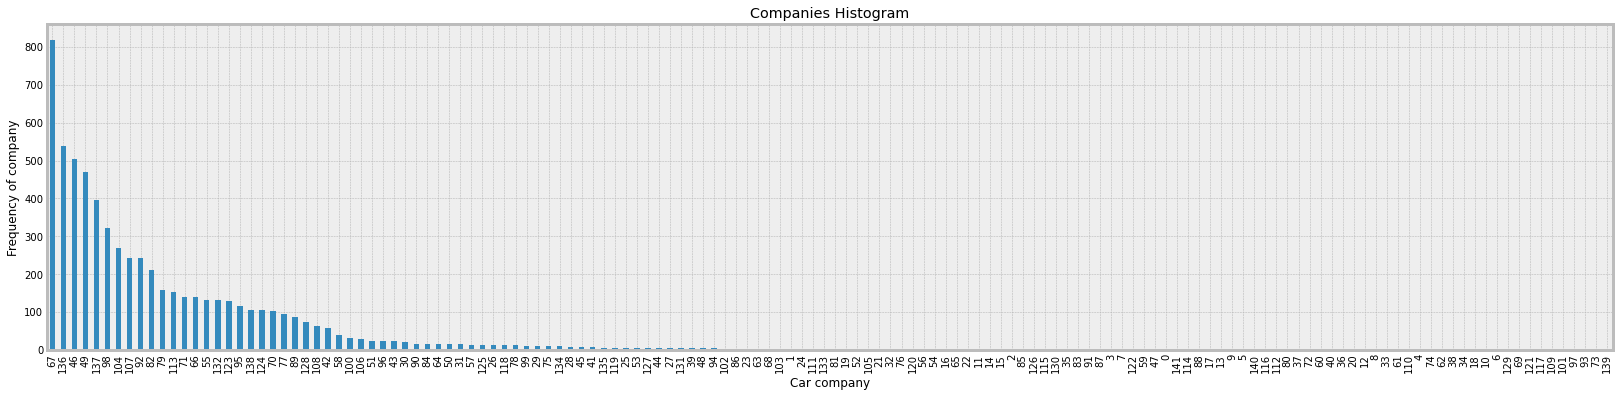

In [380]:
plt.figure(figsize=(25, 6))


plt1 = carsWithoutOutliers.make.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')


plt.show()

[Text(0.5, 0, 'Fuel Type'), Text(0, 0.5, 'Frequency of fuel type')]

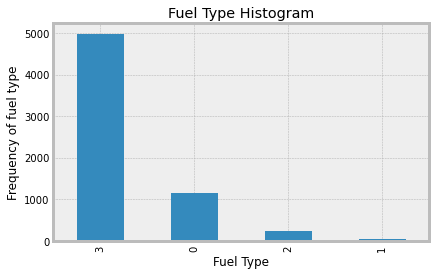

In [381]:
plt1 = carsWithoutOutliers.fuel.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

[Text(0.5, 0, 'Fuel Type'), Text(0, 0.5, 'Frequency of fuel type')]

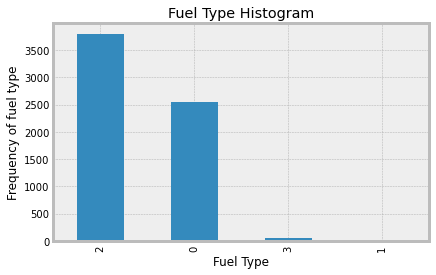

In [382]:
plt1 = carsWithoutOutliers.transmission.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

In [383]:
carsWithoutOutliers.transmission


0       2
1       0
2       0
3       3
4       3
       ..
6418    2
6419    2
6420    2
6421    0
6422    2
Name: transmission, Length: 6423, dtype: int64

In [384]:
trans = carsWithoutOutliers.transmission

In [385]:
count = carsWithoutOutliers['make'].value_counts()

count

67     819
136    539
46     505
49     469
137    395
      ... 
101      1
97       1
93       1
73       1
139      1
Name: make, Length: 142, dtype: int64

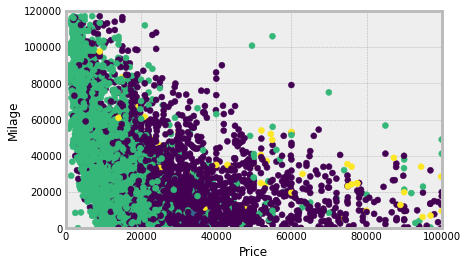

In [386]:
plt.scatter(carsWithoutOutliers['price'], carsWithoutOutliers['milage'], label=trans, c=trans)
plt.ylim([0, 120000])
plt.ylabel('Milage')
plt.xlabel('Price')

plt.xlim([0,100000])
plt.show()

### Constructing a decision tree for Random Forest Regressor

In [387]:
# Visualizing a Single Decision Tree

# Import tools needed for visualization
rf= clf
features= carsWithoutOutliers.drop('price', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [388]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(xtrain, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot',
                feature_names = feature_list, rounded = True, precision = 1, proportion = False, filled= True)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

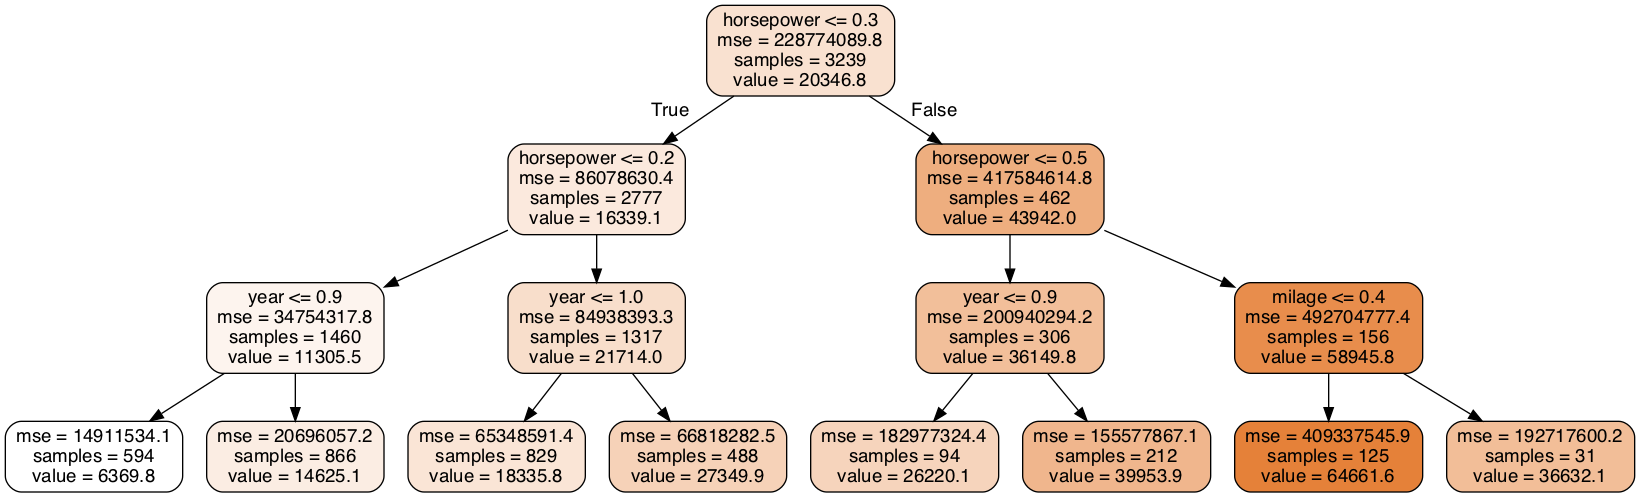

In [389]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'small_tree.png')

## Calculating feature importance 

In [390]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: horsepower           Importance: 0.64
Variable: year                 Importance: 0.15
Variable: milage               Importance: 0.09
Variable: make                 Importance: 0.04
Variable: model                Importance: 0.04
Variable: fuel                 Importance: 0.02
Variable: transmission         Importance: 0.02


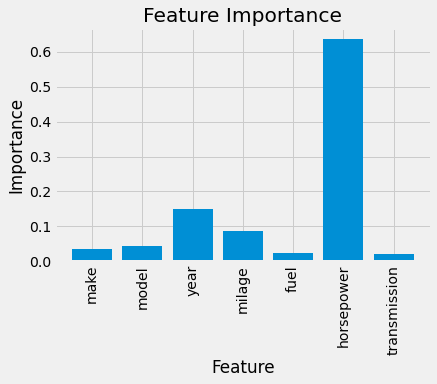

In [391]:
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Feature Importance');

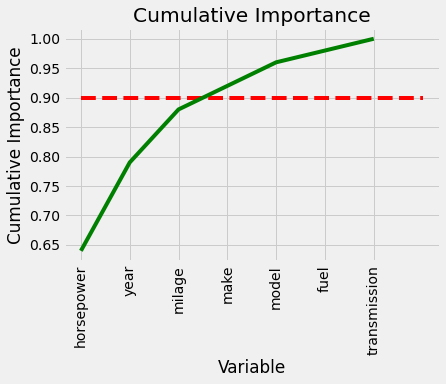

In [392]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
#plt.grid(color='white', linestyle='solid')
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 90% of importance retained
plt.hlines(y = 0.90, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance');
plt.title('Cumulative Importance');
# make background white



## Random Forest with Feature Importance - 88% Accuracy

In [393]:

afterFeaturesError = []

In [479]:
rf_most_important1 = RandomForestRegressor(n_estimators=100, n_jobs=1)
rf_most_important = RandomForestRegressor(n_estimators=100, n_jobs=1, max_depth = 17)


features = carsWithoutOutliers.drop('price', axis=1)

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)


important_indices = [feature_list.index('year'), feature_list.index('milage'),
                     feature_list.index('make'), feature_list.index('model'), feature_list.index('horsepower')]
train_important = x_train.iloc[:, important_indices]
test_important = x_test.iloc[:, important_indices]

In [480]:
rf_most_important.fit(train_important, y_train)

RandomForestRegressor(max_depth=17, n_jobs=1)

In [481]:
predictions = rf_most_important.predict(test_important)


In [482]:
# calculate average relative error for all predictions
average_relative_error = np.mean(np.abs(predictions - y_test) / y_test)
print(average_relative_error)



0.15142671852834558


In [483]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, predictions),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, predictions),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),2))

Mean Absolute Error: 3111.01
Mean Squared Error: 29625643.31
Root Mean Squared Error: 5442.94


In [484]:
score=r2_score(y_test,predictions)
score

0.8799864349158028

array([      -0.        , 38252983.0867644 , 17685537.8930882 ,
        8648741.84642928,  5461015.704006  ,  5138950.29248716,
        4273266.67364336,  4028766.66831259,  3846232.6312792 ])

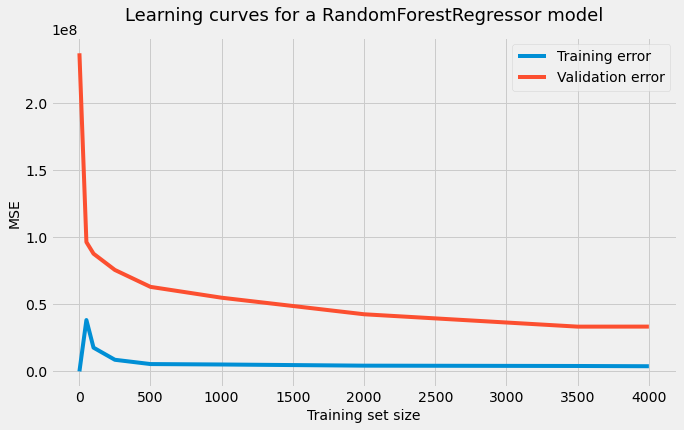

In [400]:
learning_curves(rf_most_important, train_important,y_train,train_sizes, 5)

In [401]:
afterFeaturesError.append(round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),2))

## Cross Validation

In [402]:
#parameter grid for grid search 
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9,10,None],
    'min_samples_split' : [2,3,4,5,6,7,8],
    'min_samples_leaf' : [1,2,3,4,5,6,7],
}

In [509]:
parameter_grid1 = {
    'n_estimators' : [3, 5, 10, 50, 100, 120],
    'max_depth' : range(10,20)
}


## CV for Random Forest - 86.78%

In [510]:

grid_search = GridSearchCV(estimator=rf_most_important, param_grid= parameter_grid1, cv=3, scoring='r2')

In [511]:
grid_search.fit(train_important, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(max_depth=17, n_jobs=1),
             param_grid={'max_depth': range(10, 20),
                         'n_estimators': [3, 5, 10, 50, 100, 120]},
             scoring='r2')

In [512]:
grid_search.best_params_

{'max_depth': 18, 'n_estimators': 120}

In [513]:
grid_search.best_score_

0.8698219946554895

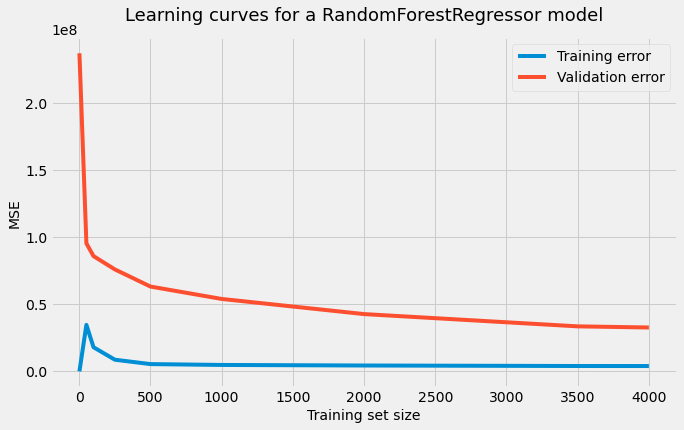

In [408]:
RFTarray = learning_curves(rf_most_important, train_important,y_train,train_sizes, 5)

In [409]:
grid_search = GridSearchCV(estimator=rf_most_important, cv=3, param_grid=parameter_grid)

# Break

In [410]:
rf_most_important = RandomForestClassifier(n_estimators=100, oob_score=True)
rf_most_important.fit(train_important, y_train)
predictions = rf_most_important.predict(test_important)
score=r2_score(y_test,predictions)
score


0.8279380345543175

In [411]:
confmatrix = confusion_matrix(y_test, predictions)

In [412]:
print(confmatrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [413]:
confmatrix.shape

(1363, 1363)

In [414]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, predictions),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, predictions),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),2))

Mean Absolute Error: 3574.95
Mean Squared Error: 42473918.78
Root Mean Squared Error: 6517.2


## Multiple Linear Regression after Feature Importance  -  70.60% Accuracy

In [415]:
regr1 = linear_model.LinearRegression()
regr1.fit(train_important,y_train)
predR = regr1.predict(test_important)
score=r2_score(y_test,predR)

In [416]:
score

0.7060862051716643

In [417]:
afterFeaturesError.append(round(np.sqrt(metrics.mean_squared_error(y_test, predR)),2))

In [418]:
#calculate average relative error for all predictions
average_relative_error = np.mean(np.abs(predR - y_test) / y_test)
print(average_relative_error)

0.31291044139001983


In [419]:
#clf = svm.SVC(kernel= 'linear', C=1, random_state= 42)
#scores = cross_val_score(clf, x, y, cv=5)
#scores

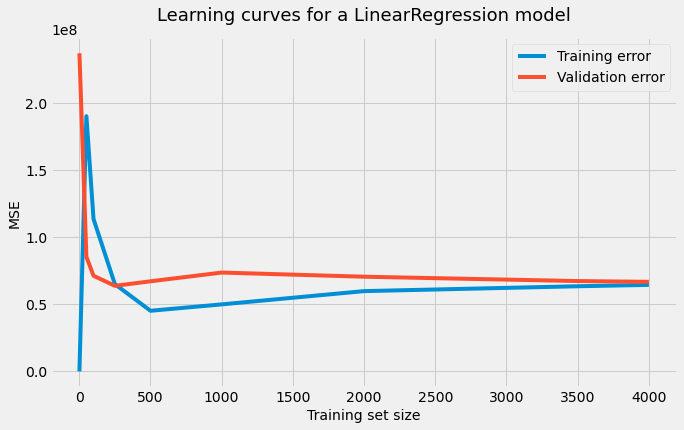

In [420]:
MLRerrors = learning_curves(regr1, train_important, y_train, train_sizes, 5)

In [487]:
#apply cross validation to linear regression model
scores = cross_val_score(regr1, train_important, y_train, cv=5)
scores


array([0.63828198, 0.70118762, 0.6858496 , 0.67332101, 0.73408223])

In [505]:
parametersLinear = {'fit_intercept':('True', 'False'), 'normalize':('True', 'False'), 'copy_X':('True', 'False')}
mlrcv = GridSearchCV(regr1, parametersLinear)


In [506]:
mlrcv.fit(train_important, y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': ('True', 'False'),
                         'fit_intercept': ('True', 'False'),
                         'normalize': ('True', 'False')})

In [507]:
mlrcv.best_params_

{'copy_X': 'True', 'fit_intercept': 'True', 'normalize': 'True'}

In [508]:
mlrcv.best_score_

0.6865444886211065

## XGBoost after feature importance - 73.28% Accuracy 

In [421]:
modelX = XGBRegressor(objective='reg:linear', learning_rate = 0.1, max_depth = 1, n_estimators = 100)

modelX.fit(train_important, y_train)
preds = modelX.predict(test_important)
print(math.sqrt(mean_squared_error(y_test, preds)))
print(r2_score(y_test, preds))

[23:29:32] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
8121.091467908266
0.7328277479660994


In [422]:
afterFeaturesError.append(round(np.sqrt(metrics.mean_squared_error(y_test, preds)),2))

[23:29:33] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[23:29:33] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[23:29:33] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[23:29:33] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[23:29:33] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[23:29:33] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[23:29:33] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[23:29:33] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[23:29:33] WARNING: ../src/objective/regression_

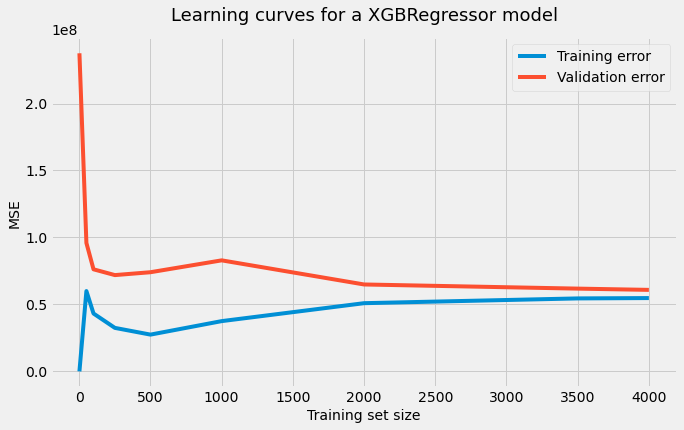

In [423]:
XGBoost = learning_curves(modelX, train_important, y_train, train_sizes, 5)

# XGBoost CV - 87.40% Accuracy

In [494]:
param_grid={"learning_rate": (0.05, 0.10, 0.15),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4],}
    
gsx = GridSearchCV(estimator = modelX, cv=3, param_grid=param_grid, scoring='r2', verbose=0, n_jobs=-1)

In [495]:
grid_result = gsx.fit(train_important, y_train)
#show results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


[16:40:21] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
Best: 0.873976 using {'colsample_bytree': 0.4, 'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 7}


In [497]:
modelX1 = XGBRegressor(objective='reg:linear', learning_rate = 0.1, max_depth = 8, n_estimators = 100, min_child_weight = 7, gamma = 0.0, colsample_bytree = 0.4)
res = modelX1.fit(train_important, y_train)


[17:02:14] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [498]:
preds = modelX1.predict(test_important)
print(math.sqrt(mean_squared_error(y_test, preds)))
print(r2_score(y_test, preds))

5502.692576961134
0.8773371508284973


In [496]:
XGBCV = learning_curves(gsx, train_important, y_train, train_sizes, 5)

/Users/amekid/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/amekid/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/amekid/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/amekid/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py", line 841, in fit
    self._run_search(evaluate_candidates)
  File "/Users/amekid/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py", line 1288, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/Users/amekid/opt/anaconda3/lib/python3.8/site-packages/s

[16:47:25] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:22] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:52:06] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:55:05] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:57:51] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: 

# Results 

In [424]:
models = []
models.append(('RFT', RandomForestRegressor(n_estimators=100, oob_score=True)))
models.append(('MLR', linear_model.LinearRegression()))
models.append(('XGB', XGBRegressor(objective='reg:linear', learning_rate=0.1, max_depth = 1, n_estimators= 100)))

In [425]:
results = []
names = []
scoring = 'accuracy'



In [426]:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, train_important, y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RFT: 0.846778 (0.052835)
MLR: 0.680160 (0.046361)
[23:29:45] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[23:29:45] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[23:29:45] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[23:29:45] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[23:29:45] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[23:29:45] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[23:29:45] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[23:29:45] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror

In [427]:
arrayOfAll = []
arrayOfAll.append(RFTarray)
arrayOfAll.append(MLRerrors)
arrayOfAll.append(XGBoost)

In [428]:
arrayOfAll

[array([      -0.        , 34646255.2342524 , 17995019.0979992 ,
         8689145.4795596 ,  5431694.03453812,  4799722.76760012,
         4391963.58758435,  4011930.04442347,  3991929.24962676]),
 array([-0.00000000e+00,  1.90009362e+08,  1.13488204e+08,  6.49784658e+07,
         4.51351551e+07,  4.98960801e+07,  5.97714047e+07,  6.33914423e+07,
         6.44121283e+07]),
 array([1.03145313e+04, 5.99995985e+07, 4.32236841e+07, 3.24946177e+07,
        2.74705503e+07, 3.75427850e+07, 5.09361130e+07, 5.44948455e+07,
        5.47556179e+07])]

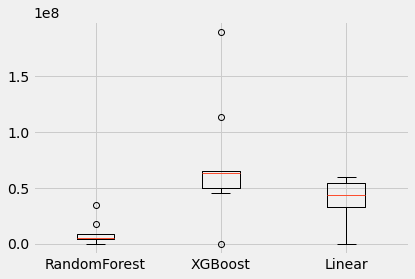

In [429]:
plt.boxplot(arrayOfAll)
plt.xticks([1, 2, 3], ['RandomForest', 'XGBoost', 'Linear'])
plt.show()

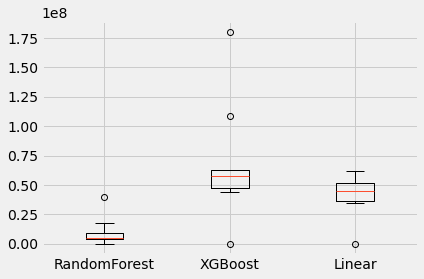

In [430]:
plt.boxplot(beforeFeatures)
plt.xticks([1, 2, 3], ['RandomForest', 'XGBoost', 'Linear'])
plt.show()

In [431]:
afterFeaturesError

[5378.27, 8517.82, 8121.09]

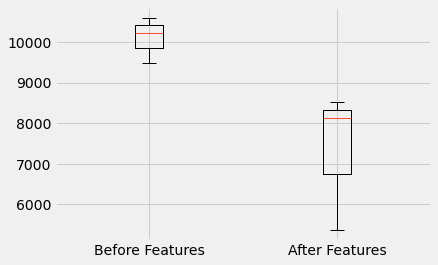

In [432]:
#compare afterfeatures error with before features error
plt.boxplot([beforeFeaturesError, afterFeaturesError])
plt.xticks([1, 2], ['Before Features', 'After Features'])
plt.show()


In [433]:
beforeFeaturesError

[10606.45, 9499.57, 10229.24]